# Titanic Dataset

In [1]:
from pathlib import Path

# data analysis
import pandas as pd
import numpy as np
np.set_printoptions(precision=3, suppress=True)

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# display settings
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100%; }</style>"))

In [2]:
titanic_dataset = Path.cwd() / "datasets" / "titanic"

for file in titanic_dataset.glob("*.csv"):
    print(file)

/Volumes/Z_Partition/[Python]/z_virtualenv/MACHINE_LEARNING/ML_Projs/Master_HandsOn_ML_SK_TF_2/datasets/titanic/gender_submission.csv
/Volumes/Z_Partition/[Python]/z_virtualenv/MACHINE_LEARNING/ML_Projs/Master_HandsOn_ML_SK_TF_2/datasets/titanic/test.csv
/Volumes/Z_Partition/[Python]/z_virtualenv/MACHINE_LEARNING/ML_Projs/Master_HandsOn_ML_SK_TF_2/datasets/titanic/train.csv


In [3]:
titanic = pd.read_csv(titanic_dataset / "train.csv")
titanic_test = pd.read_csv(titanic_dataset / "test.csv")
titanic_test_2 = pd.read_csv(titanic_dataset / "gender_submission.csv")

print(titanic.shape, titanic_test.shape, titanic_test_2.shape)

(891, 12) (418, 11) (418, 2)


In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
set(titanic.columns).symmetric_difference(set(titanic_test.columns))

{'Survived'}

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
for dataset in [titanic, titanic_test]:
    dataset["Pclass"] = dataset["Pclass"].astype("category")
    dataset["Sex"] = dataset["Sex"].astype("category")
#     dataset["Cabin"] = dataset["Cabin"].astype("category")
    dataset["Embarked"] = dataset["Embarked"].astype("category")

In [9]:
titanic.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [10]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
titanic.columns[titanic.isna().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [12]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null category
Name           418 non-null object
Sex            418 non-null category
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null category
dtypes: category(3), float64(2), int64(3), object(3)
memory usage: 27.8+ KB


In [13]:
titanic_test.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [14]:
titanic_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
titanic_test.columns[titanic_test.isna().any()]

Index(['Age', 'Fare', 'Cabin'], dtype='object')

In [16]:
titanic.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
categorical_col = ["Sex", "Pclass", "Cabin", "Embarked"]

for cat in categorical_col:
    print(pd.value_counts(titanic[cat]), sep="\n")

male      577
female    314
Name: Sex, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
C23 C25 C27    4
B96 B98        4
G6             4
D              3
F2             3
              ..
B50            1
A23            1
A6             1
B80            1
A7             1
Name: Cabin, Length: 147, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


## Overview of Survival Rates

In [18]:
titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

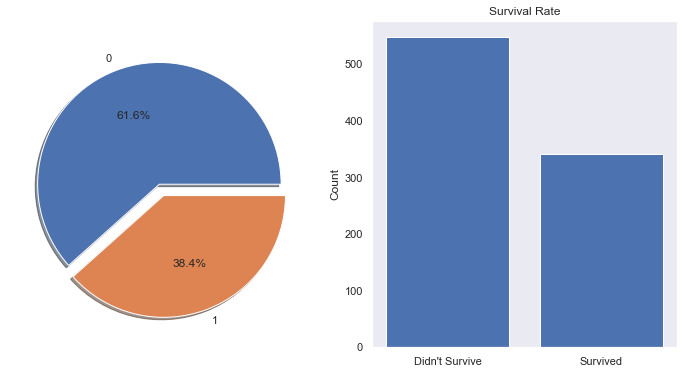

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].pie(titanic["Survived"].value_counts().values, labels=titanic["Survived"].value_counts().index, explode=[0, 0.1], shadow=True, autopct="%1.1f%%")

axes[1].bar(titanic["Survived"].value_counts().index, titanic["Survived"].value_counts().values)
axes[1].set_xticks(titanic["Survived"].value_counts().index)
axes[1].set_xticklabels(["Didn't Survive", "Survived"])
axes[1].set_title("Survival Rate")
axes[1].set_ylabel("Count")
axes[1].grid()

In [20]:
titanic.corr()["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Name: Survived, dtype: float64

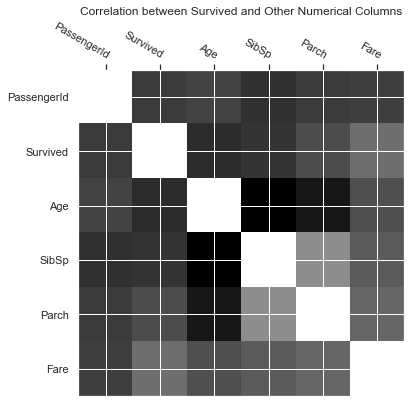

In [21]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(titanic.corr(), cmap="gray", interpolation="nearest")
ax.set_title("Correlation between Survived and Other Numerical Columns")
ax.set_xticks(np.arange(len(titanic.corr().index)))
ax.set_yticks(np.arange(len(titanic.corr().index)))
ax.set_xticklabels(titanic.corr().index)
ax.set_yticklabels(titanic.corr().index)
ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
plt.setp(ax.get_xticklabels(), rotation="-30", ha="right", rotation_mode="anchor")
plt.show()

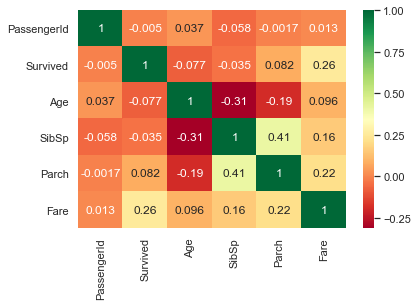

In [22]:
sns.heatmap(titanic.corr(), annot=True, cmap="RdYlGn")

## Exploratory Data Analysis 
### Pclass Feature

In [23]:
pd.crosstab(titanic["Pclass"], titanic["Survived"], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


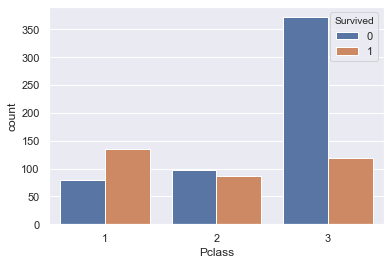

In [24]:
## Visual representation of the above 

sns.countplot("Pclass", hue="Survived", data=titanic)

In [25]:
## Lowest chance of survival in class 3
## Female has higher chance of survival

titanic[["Pclass", "Sex", "Survived"]].groupby(["Pclass", "Sex"]).mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

In [26]:
## Using Pivot table for same results as above 

titanic.pivot_table(index="Pclass", columns="Sex", values="Survived", aggfunc="mean")

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


(0, 300)

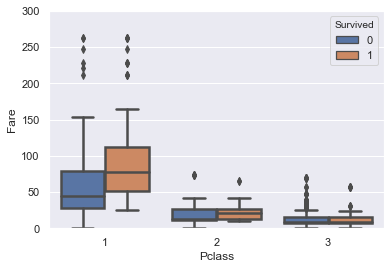

In [27]:
## Pclass 1 has higher survival rate, higher fare results in higher survival rate

sns.boxplot(x="Pclass", y="Fare", hue="Survived", data=titanic, linewidth=2.5)
plt.ylim(0, 300)

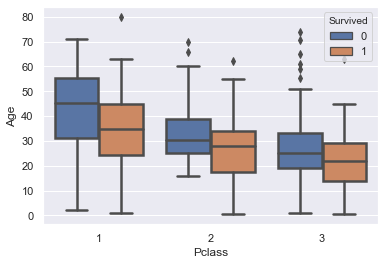

In [28]:
## Younger people within each Pclass had a better survival rate

sns.boxplot(x="Pclass", y="Age", hue="Survived", data=titanic, linewidth=2.5)

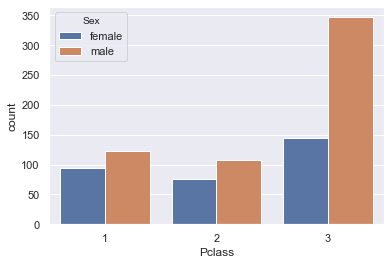

In [29]:
## Majority of class 3 passengers were male

sns.countplot(x="Pclass", hue="Sex", data=titanic)

### Name Feature

In [30]:
titanic["Name"][:5]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [31]:
import re

def get_salutation(name):
    first_name = name.split(",")[1].strip()
    pattern = re.compile(r"(\w+\s*\w*\.)?")
    salutation = re.match(pattern, first_name)
    return salutation[1].strip()[:-1]

In [32]:
for dataset in [titanic, titanic_test]:
    dataset["NameSalute"] = dataset["Name"].apply(get_salutation)
    print(dataset["NameSalute"].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


In [33]:
## This salutation from test file is missing from the train file 
## Will have problems when trying to predict the test file because this salutation not one hot encoded.

set(titanic_test["NameSalute"].unique()).difference(set(titanic["NameSalute"].unique()))

{'Dona'}

In [34]:
print(np.flatnonzero(titanic_test["Name"].str.contains("Dona. ")), titanic_test["Name"][414], sep="\n")

[414]
Oliva y Ocana, Dona. Fermina


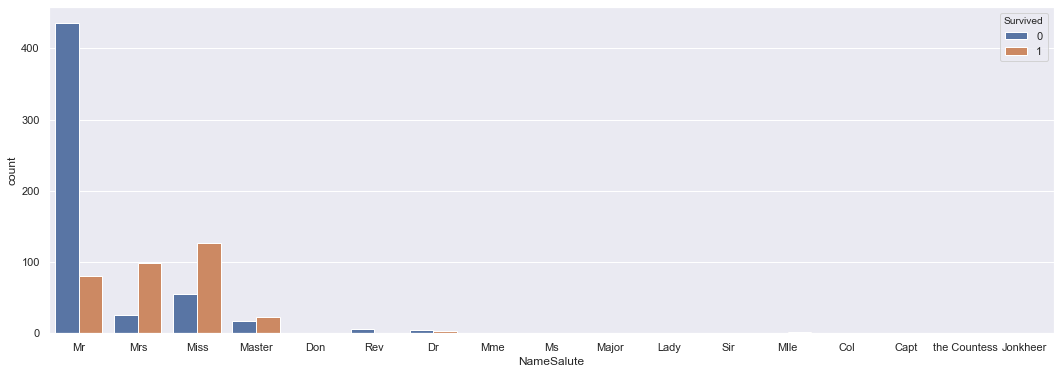

In [35]:
# titanic["NameSalute"].hist(by=titanic["Survived"], figsize=(12, 6))
plt.figure(figsize=(18, 6))

sns.countplot("NameSalute", hue="Survived", data=titanic)

In [36]:
pd.crosstab(titanic["NameSalute"], titanic["Sex"])

Sex,female,male
NameSalute,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [37]:
for dataset in [titanic, titanic_test]:
    dataset["NameSalute"].replace(["Don", "Rev", "Dr", "Mme", "Major", "Lady", "Sir", "Col", "Capt", "the Countess", "Jonkheer", "Dona"], "Rare", inplace=True)
    dataset["NameSalute"].replace(["Mrs", "Ms", "Mlle"], "Miss", inplace=True)
    dataset["NameSalute"].map({"Mr": 0, "Miss": 1, "Master": 2, "Rare": 3})

[Text(0, 0, 'Mr'),
 Text(0, 0, 'Miss/Mrs/Ms/Mlle'),
 Text(0, 0, 'Master'),
 Text(0, 0, 'Rare')]

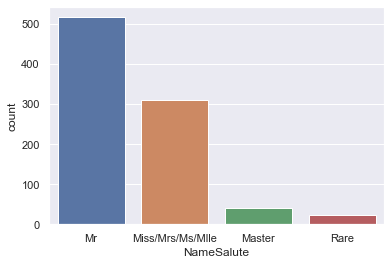

In [38]:
g = sns.countplot(titanic["NameSalute"])
g.set_xticklabels(["Mr", "Miss/Mrs/Ms/Mlle", "Master", "Rare"])

In [39]:
titanic[["NameSalute", "Survived"]].groupby("NameSalute").mean().sort_values(by="Survived", ascending=False)

,Survived
NameSalute,
Miss,0.738710
Master,0.575000
Rare,0.375000
Mr,0.156673


In [40]:
titanic.drop(["Name"], axis=1, inplace=True)
titanic_test.drop(["Name"], axis=1, inplace=True)

### Sex Feature

In [41]:
titanic[["Sex", "Survived"]].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


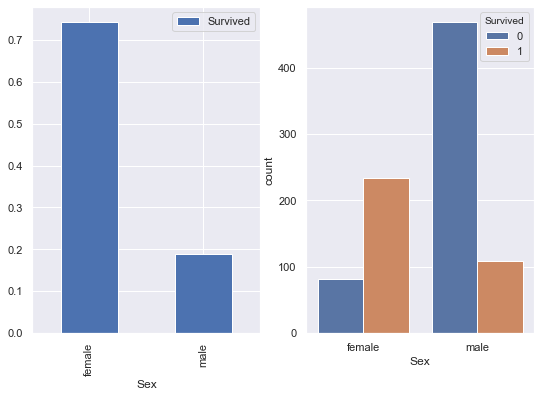

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 6))
                         
titanic[["Survived", "Sex"]].groupby("Sex").mean().plot(kind="bar", ax=axes[0])
axes[0].grid("on")

sns.countplot("Sex", hue="Survived", data=titanic, ax=axes[1])

### Age Feature

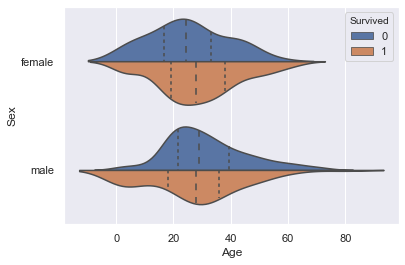

In [43]:
# titanic["Age"].hist(by=titanic["Survived"], figsize=(12, 6), bins=50)
sns.violinplot(x="Age", y="Sex", hue="Survived", data=titanic, split=True, inner="quartile")

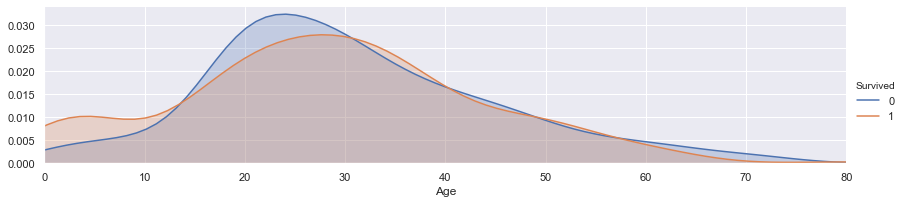

In [44]:
facet = sns.FacetGrid(titanic, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(0, titanic["Age"].max()))
facet.add_legend()

In [45]:
titanic[["Age", "Survived"]].groupby("Age").mean()[:3]

,Survived
Age,
0.42,1.000000
0.67,1.000000
0.75,1.000000
0.83,1.000000
0.92,1.000000
1.00,0.714286
2.00,0.300000
3.00,0.833333


In [46]:
titanic[["Age", "Survived"]].groupby("Age", as_index=False).mean()[:3]

,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0


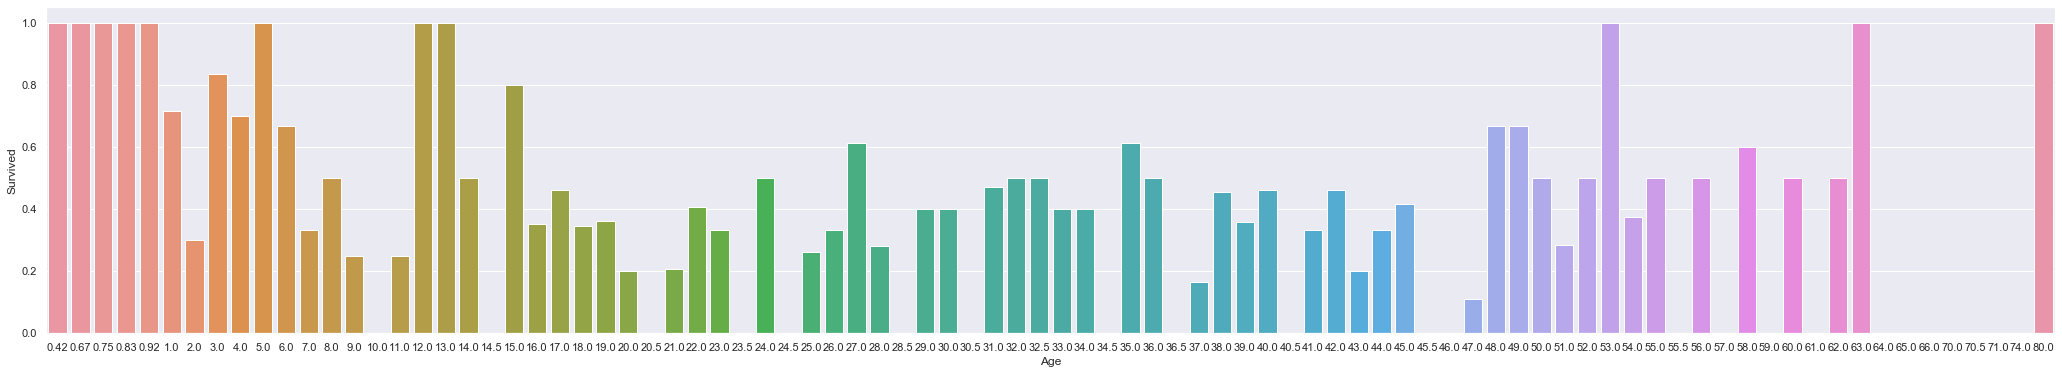

In [47]:
fig, axes = plt.subplots(1, 1, figsize=(36, 6))
average_survival = titanic[["Age", "Survived"]].groupby("Age", as_index=False).mean()

sns.barplot(x="Age", y="Survived", data=average_survival)

In [48]:
for dataset in [titanic, titanic_test]:
    dataset["AgeBuckets"] = pd.cut(titanic["Age"], bins=[0, 10, 20, 40, 60, 90], labels=["kids", "teenagers", "young_adults", "mature_adults", "seniors"])

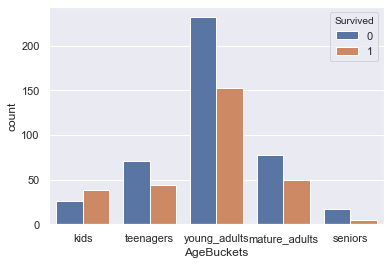

In [49]:
sns.countplot("AgeBuckets", hue="Survived", data=titanic)

In [50]:
titanic[["AgeBuckets", "Survived"]].groupby("AgeBuckets").mean().sort_values(by="Survived", ascending=False)

## Kids had the best chance of survival

,Survived
AgeBuckets,
kids,0.593750
young_adults,0.397403
mature_adults,0.390625
teenagers,0.382609
seniors,0.227273


In [51]:
titanic.drop(["Age"], axis=1, inplace=True)
titanic_test.drop(["Age"], axis=1, inplace=True)

### Total_Family (SibSp and Parch) Feature

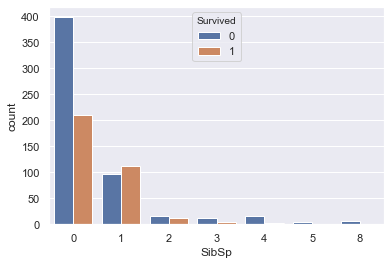

In [52]:
sns.countplot("SibSp", hue="Survived", data=titanic)

/Users/asd/.virtualenvs/ds/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


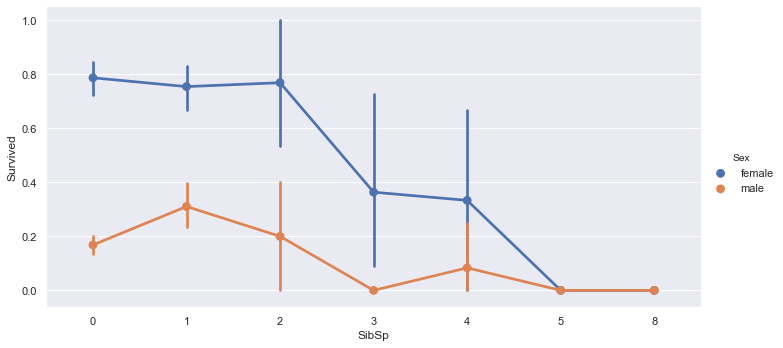

In [53]:
sns.factorplot("SibSp", "Survived", hue="Sex", data=titanic, height=5, aspect=2)

In [54]:
titanic[["SibSp", "Survived"]].groupby("SibSp").mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


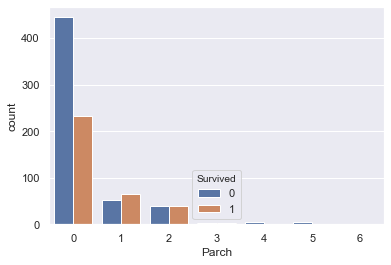

In [55]:
sns.countplot("Parch", hue="Survived", data=titanic)

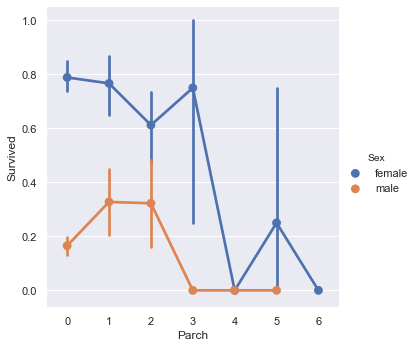

In [56]:
sns.factorplot("Parch", "Survived", hue="Sex", data=titanic)

In [57]:
titanic[["Parch", "Survived"]].groupby("Parch").mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


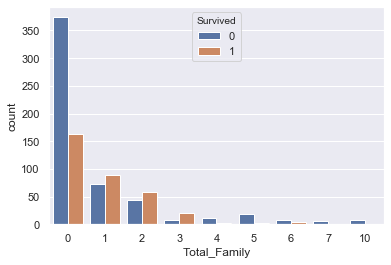

In [58]:
for dataset in [titanic, titanic_test]:
    dataset["Total_Family"] = dataset["SibSp"] + dataset["Parch"]

sns.countplot("Total_Family", hue="Survived", data=titanic)

In [59]:
titanic[["Total_Family", "Survived"]].groupby("Total_Family").mean()

,Survived
Total_Family,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [60]:
titanic.drop(["SibSp", "Parch"], axis=1, inplace=True)
titanic_test.drop(["SibSp", "Parch"], axis=1, inplace=True)

### Ticket Feature

In [61]:
for dataset in [titanic, titanic_test]:
    dataset["TicketHeader"] = dataset["Ticket"].apply(lambda x: x.split()[0][0] if x.find(" ") > 0 else "X")

In [62]:
titanic["TicketHeader"].value_counts()

X    665
S     65
P     65
C     47
A     29
W     13
F      7
Name: TicketHeader, dtype: int64

In [63]:
titanic_test["TicketHeader"].value_counts()

X    296
S     33
P     33
C     30
A     13
W      6
F      6
L      1
Name: TicketHeader, dtype: int64

In [64]:
np.flatnonzero(titanic_test["TicketHeader"]=="L")

array([312])

In [65]:
titanic_test["TicketHeader"].replace(["L"], "F", inplace=True)

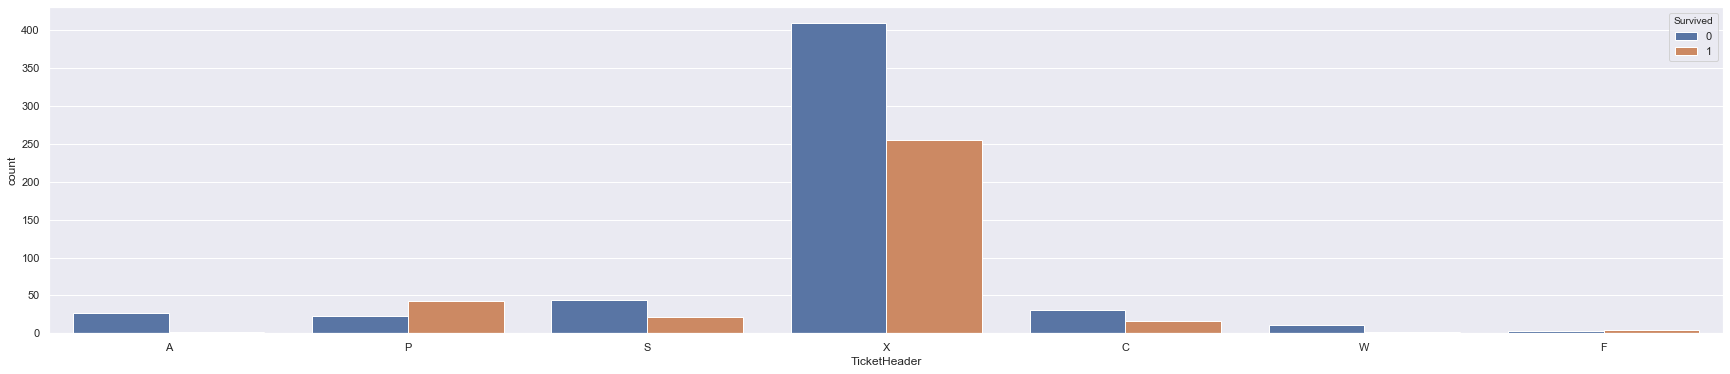

In [66]:
# titanic["TicketHeader"].hist(by=titanic["Survived"])
plt.figure(figsize=(30, 6))
sns.countplot("TicketHeader", hue="Survived", data=titanic)

In [67]:
titanic.drop(["Ticket"], axis=1, inplace=True)
titanic_test.drop(["Ticket"], axis=1, inplace=True)
titanic.drop(["TicketHeader"], axis=1, inplace=True)
titanic_test.drop(["TicketHeader"], axis=1, inplace=True)

### Fare Feature

In [68]:
titanic["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

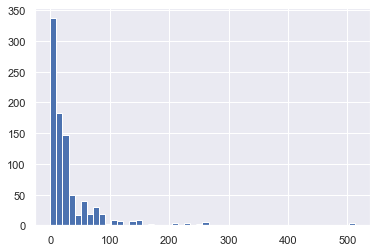

In [69]:
titanic["Fare"].hist(bins=50)

In [70]:
# titanic["FareBuckets"] = pd.qcut(titanic["Fare"], bins=[0, 18, 36, 54, 520])
for dataset in [titanic, titanic_test]:
    dataset["FareBuckets"] = pd.qcut(dataset["Fare"], 4, labels=["low", "moderate", "high", "premium"])

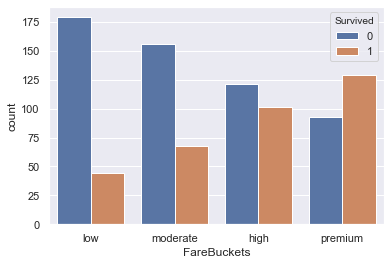

In [71]:
sns.countplot("FareBuckets", hue="Survived", data=titanic)

In [72]:
titanic[["FareBuckets", "Survived"]].groupby("FareBuckets").mean()

,Survived
FareBuckets,
low,0.197309
moderate,0.303571
high,0.454955
premium,0.581081


In [73]:
titanic.drop(["Fare"], axis=1, inplace=True)
titanic_test.drop(["Fare"], axis=1, inplace=True)

### Cabin Feature

In [74]:
titanic["Cabin"].unique(), titanic_test["Cabin"].unique()

(array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
        'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
        'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
        'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
        'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
        'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
        'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
        'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
        'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
        'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
        'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
        'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
        'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
        'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
   

In [75]:
for dataset in [titanic, titanic_test]:
    dataset["Cabin_Type"] = dataset["Cabin"].apply(lambda x: x[0] if not isinstance(x, float) else x)

In [76]:
titanic["Cabin_Type"].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_Type, dtype: int64

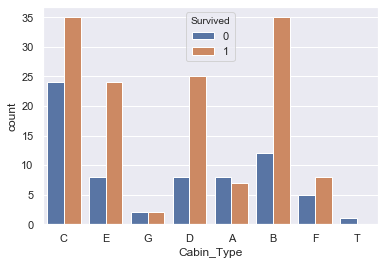

In [77]:
sns.countplot("Cabin_Type", hue="Survived", data=titanic)

In [78]:
titanic[["Cabin_Type", "Survived"]].groupby("Cabin_Type").mean()

,Survived
Cabin_Type,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
T,0.000000


In [79]:
## Too many missing values, removing this feature 

titanic.drop(["Cabin"], axis=1, inplace=True)
titanic.drop(["Cabin_Type"], axis=1, inplace=True)
titanic_test.drop(["Cabin"], axis=1, inplace=True)
titanic_test.drop(["Cabin_Type"], axis=1, inplace=True)

### Embarked Feature

In [80]:
pd.crosstab([titanic["Embarked"], titanic["Pclass"]],[titanic["Sex"], titanic["Survived"]], margins=True).style.background_gradient(cmap='summer_r')

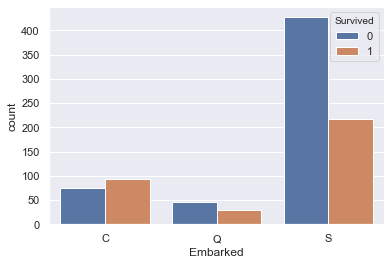

In [81]:
sns.countplot("Embarked", hue="Survived", data=titanic)

In [82]:
titanic[["Embarked", "Survived"]].groupby("Embarked").mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


### PassengerID feature

In [83]:
titanic.drop(["PassengerId"], axis=1, inplace=True)
titanic_test.drop(["PassengerId"], axis=1, inplace=True)

## Check Transformed Data

In [84]:
titanic.head()

,Survived,Pclass,Sex,Embarked,NameSalute,AgeBuckets,Total_Family,FareBuckets
0,0,3,male,S,Mr,young_adults,1,low
1,1,1,female,C,Miss,young_adults,1,premium
2,1,3,female,S,Miss,young_adults,0,moderate
3,1,1,female,S,Miss,young_adults,1,premium
4,0,3,male,S,Mr,young_adults,0,moderate


In [85]:
titanic_test.head()

,Pclass,Sex,Embarked,NameSalute,AgeBuckets,Total_Family,FareBuckets
0,3,male,Q,Mr,young_adults,0,low
1,3,female,S,Miss,young_adults,1,low
2,2,male,Q,Mr,young_adults,0,moderate
3,3,male,S,Mr,young_adults,0,moderate
4,3,female,S,Miss,young_adults,2,moderate


In [86]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived        891 non-null int64
Pclass          891 non-null category
Sex             891 non-null category
Embarked        889 non-null category
NameSalute      891 non-null object
AgeBuckets      714 non-null category
Total_Family    891 non-null int64
FareBuckets     891 non-null category
dtypes: category(5), int64(2), object(1)
memory usage: 26.0+ KB


In [87]:
# from scipy.stats import mode

# def most_freq_value(col_data):
#     return mode(col_data)[0][0]

# most_freq_age = most_freq_value(titanic["Age"])
# most_freq_cabin = most_freq_value(titanic["Cabin"])
# most_freq_embarked = most_freq_value(titanic["Embarked"])
# print(most_freq_age, most_freq_cabin, most_freq_embarked, sep="\n")

# titanic["Age"].fillna(most_freq_age, inplace=True)
# titanic["Cabin"].fillna(most_freq_cabin, inplace=True)
# titanic["Embarked"].fillna(most_freq_embarked, inplace=True)

# titanic.info()

## Creating the Pipeline

In [88]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

numeric_columns = ["Total_Family"]
cat_columns = ["Pclass", "Sex", "Embarked", "AgeBuckets", "NameSalute", "FareBuckets"]

# class to find most frequent category in each column
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X.columns], index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

## Fill missing numerical values with median
numeric_pipeline = Pipeline([
    ("median_imputer", SimpleImputer(strategy="median"))
])

## Fill missing categorical columns with most frequent
cat_pipeline = Pipeline([
    ("mostfreq_imputer", MostFrequentImputer()),
    ("onehot_encoder", OneHotEncoder(sparse=False))
])

col_transformer = ColumnTransformer([
    ("numeric_pipeline", numeric_pipeline, numeric_columns),
    ("cat_pipeline", cat_pipeline, cat_columns),
])

In [89]:
y_train = titanic["Survived"]
titanic.drop(["Survived"], axis=1, inplace=True)
X_train = col_transformer.fit_transform(titanic)

print(X_train.shape, y_train.shape, X_train[:3], sep="\n")

X_test = col_transformer.transform(titanic_test)
y_test = titanic_test_2["Survived"]
print(X_test.shape, y_test.shape)

(891, 22)
(891,)
[[1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.]
 [1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0.]]
(418, 22) (418,)


In [90]:
## Need to obtain the column names after going through OneHotEncoding

cat_pipeline.fit(titanic[cat_columns])

Pipeline(memory=None,
         steps=[('mostfreq_imputer', MostFrequentImputer()),
                ('onehot_encoder',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='error', sparse=False))],
         verbose=False)

In [91]:
column_names = np.append(numeric_columns, cat_pipeline.named_steps["onehot_encoder"].get_feature_names(cat_columns))
print(column_names, len(column_names), sep="\n")

['Total_Family' 'Pclass_1' 'Pclass_2' 'Pclass_3' 'Sex_female' 'Sex_male'
 'Embarked_C' 'Embarked_Q' 'Embarked_S' 'AgeBuckets_kids'
 'AgeBuckets_mature_adults' 'AgeBuckets_seniors' 'AgeBuckets_teenagers'
 'AgeBuckets_young_adults' 'NameSalute_Master' 'NameSalute_Miss'
 'NameSalute_Mr' 'NameSalute_Rare' 'FareBuckets_high' 'FareBuckets_low'
 'FareBuckets_moderate' 'FareBuckets_premium']
22


## Check Model Accuracy

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier()
svm = SVC(kernel="rbf", C=1, gamma=0.1, probability=True)
gnb = GaussianNB()
dectree = DecisionTreeClassifier()
randforest = RandomForestClassifier(n_estimators=100)
etrees = ExtraTreesClassifier()
gradientboost = GradientBoostingClassifier()
adaboost = AdaBoostClassifier(DecisionTreeClassifier(), learning_rate=0.1)
lindiscriminant = LinearDiscriminantAnalysis()

models = [knn, svm, gnb, dectree, randforest, etrees, gradientboost, adaboost, lindiscriminant]
model_types = list()
accuracies = list()
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    model_type = type(model).__name__
    model_types.append(model_type)
    accuracies.append(accuracy_score(prediction, y_test))

model_accuracies = pd.DataFrame({"Accuracy": accuracies}, index=model_types)
model_accuracies

,Accuracy
KNeighborsClassifier,0.846890
SVC,0.933014
GaussianNB,0.875598
DecisionTreeClassifier,0.834928
RandomForestClassifier,0.849282
ExtraTreesClassifier,0.837321
GradientBoostingClassifier,0.868421
AdaBoostClassifier,0.837321
LinearDiscriminantAnalysis,0.933014


## Check for Sensitivity to Data using Cross-Validation

In [93]:
cv_results = list()

for model in models:
    cv_results.append(cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy", n_jobs=-1))
    
cv_means = list()
cv_std = list()
for result in cv_results:
    cv_means.append(result.mean())
    cv_std.append(result.std())

summary = pd.DataFrame({"means": cv_means, "std": cv_std}, index=model_types)
summary

,means,std
KNeighborsClassifier,0.822734,0.041318
SVC,0.832784,0.034911
GaussianNB,0.781186,0.041248
DecisionTreeClassifier,0.811498,0.047096
RandomForestClassifier,0.814894,0.047303
ExtraTreesClassifier,0.815993,0.046368
GradientBoostingClassifier,0.821610,0.048271
AdaBoostClassifier,0.808127,0.043680
LinearDiscriminantAnalysis,0.828302,0.032852


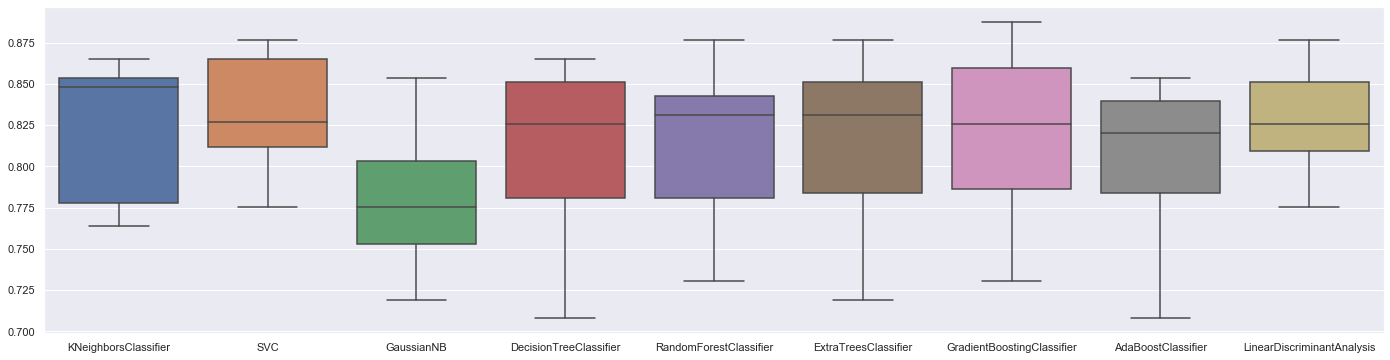

In [94]:
plt.figure(figsize=(24, 6))
sns.boxplot(x=model_types, y=cv_results)

## Hyperparameter Tuning
### Grid Search

In [95]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"n_neighbors": list(range(1, 20, 1)), "weights": ["uniform", "distance"]}
]
     
gridsearch = GridSearchCV(knn, param_grid=param_grid, cv=4, verbose=2, n_jobs=-1)
gridsearch.fit(X_train, y_train)
knn_best = gridsearch.best_estimator_
gridsearch.best_params_, gridsearch.best_score_

Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:    0.7s finished


({'n_neighbors': 14, 'weights': 'uniform'}, 0.8249151617985699)

In [96]:
from scipy.stats import expon

param_grid = [
    {"kernel": ["linear"], "C": list(range(1, 200, 10))},
    {"kernel": ["rbf"], "C": list(range(1, 200, 10)), "gamma": expon(scale=1.0).rvs(20)}
]

gridsearch = GridSearchCV(svm, param_grid=param_grid, cv=4, verbose=2, n_jobs=-1)
gridsearch.fit(X_train, y_train)
svm_best = gridsearch.best_estimator_
gridsearch.best_params_, gridsearch.best_score_

Fitting 4 folds for each of 420 candidates, totalling 1680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 365 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 648 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done 1013 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 1458 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done 1680 out of 1680 | elapsed:  1.1min finished


({'C': 1, 'gamma': 0.10268191232680773, 'kernel': 'rbf'}, 0.8339140710216943)

In [106]:
param_grid = [
    {"criterion": ["gini", "entropy"], "max_features": list(range(1, 20, 2)), "max_depth": list(range(4, 12, 2)), "max_leaf_nodes": list(range(2, 30, 2)),
     "min_samples_split": list(range(1, 20, 4)) }
]

gridsearch = GridSearchCV(dectree, param_grid=param_grid, cv=4, verbose=2, n_jobs=-1)
gridsearch.fit(X_train, y_train)
dectree_best = gridsearch.best_estimator_
gridsearch.best_params_, gridsearch.best_score_

Fitting 4 folds for each of 5600 candidates, totalling 22400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 2368 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 8864 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 17920 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 22400 out of 22400 | elapsed:   20.4s finished


({'criterion': 'gini',
  'max_depth': 10,
  'max_features': 9,
  'max_leaf_nodes': 12,
  'min_samples_split': 5},
 0.8384084757403143)

In [107]:
param_grid = [
    {"n_estimators": list(range(1, 100, 3)), "max_features": list(range(1, 20, 2)), "min_samples_split": list(range(1, 20, 4))}
]

gridsearch = GridSearchCV(randforest, param_grid=param_grid, cv=4, verbose=2, n_jobs=-1)
gridsearch.fit(X_train, y_train)
randforest_best = gridsearch.best_estimator_
gridsearch.best_params_, gridsearch.best_score_

Fitting 4 folds for each of 1650 candidates, totalling 6600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 557 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 1048 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 1610 tasks      | elapsed:   43.5s
[Parallel(n_jobs=-1)]: Done 2500 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3554 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 4768 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 6146 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 6600 out of 6600 | elapsed:  3.4min finished


({'max_features': 17, 'min_samples_split': 13, 'n_estimators': 19},
 0.8339039712358098)

In [108]:
param_grid = [
    {"n_estimators": list(range(1, 100, 3)), "max_features": list(range(1, 30, 2)), "min_samples_split": list(range(1, 20, 4))}
]

gridsearch = GridSearchCV(etrees, param_grid=param_grid, cv=4, verbose=2, n_jobs=-1)
gridsearch.fit(X_train, y_train)
etrees_best = gridsearch.best_estimator_
gridsearch.best_params_, gridsearch.best_score_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 4 folds for each of 2475 candidates, totalling 9900 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 557 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 1120 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 1850 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 2740 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3794 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 5008 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 6386 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 7924 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 9626 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 9885 out of 9900 | elapsed:  3.8min remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 9900 out of 9900 | elapsed:  3.8min finished


({'max_features': 17, 'min_samples_split': 17, 'n_estimators': 73},
 0.8238193350300973)

In [109]:
param_grid = [
    {"n_estimators": list(range(1, 100, 3)), "learning_rate": [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]}
]
     
gridsearch = GridSearchCV(gradientboost, param_grid=param_grid, cv=4, verbose=2, n_jobs=-1)
gridsearch.fit(X_train, y_train)
gradientboost_best = gridsearch.best_estimator_
gridsearch.best_params_, gridsearch.best_score_

Fitting 4 folds for each of 396 candidates, totalling 1584 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 1316 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 1584 out of 1584 | elapsed:   30.4s finished


({'learning_rate': 0.3, 'n_estimators': 4}, 0.8383933260614875)

In [110]:
param_grid = [
    {"n_estimators": list(range(1, 100, 3)), "learning_rate": np.linspace(0.05, 1, 19), "algorithm": ["SAMME", "SAMME.R"], 
     "base_estimator__criterion": ["gini", "entropy"], "base_estimator__splitter": ["best", "random"]}
]
     
gridsearch = GridSearchCV(adaboost, param_grid=param_grid, cv=4, verbose=2, n_jobs=-1)
gridsearch.fit(X_train, y_train)
adaboost_best = gridsearch.best_estimator_
gridsearch.best_params_, gridsearch.best_score_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 4 folds for each of 5016 candidates, totalling 20064 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 485 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 1133 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 1578 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2105 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2712 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 3401 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 4170 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 5021 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 5952 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 6965 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 8058 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 9233 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 10488 tasks      | elapsed:  8.

({'algorithm': 'SAMME',
  'base_estimator__criterion': 'gini',
  'base_estimator__splitter': 'random',
  'learning_rate': 0.15555555555555556,
  'n_estimators': 85},
 0.8126136225912011)

### Voting Classifier 

In [111]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[("knn", knn_best),
                                          ("rbfsvm", svm_best),
                                          ("gnb", GaussianNB()),
                                          ("dectree", dectree_best),
                                          ("randforest", randforest_best),
                                          ("etrees", etrees_best),
                                          ("gboost", gradientboost_best),
                                          ("adaboost", adaboost_best),                                          
                                         ], voting='soft').fit(X_train, y_train)

print("Accuracy:", voting_clf.score(X_test, y_test))
cross = cross_val_score(voting_clf, X_train, y_train, cv=5, scoring="accuracy")
print("CV Score", cross.mean())

Accuracy: 0.9210526315789473
CV Score 0.8282781997363632


### Feature Importances for Different Models

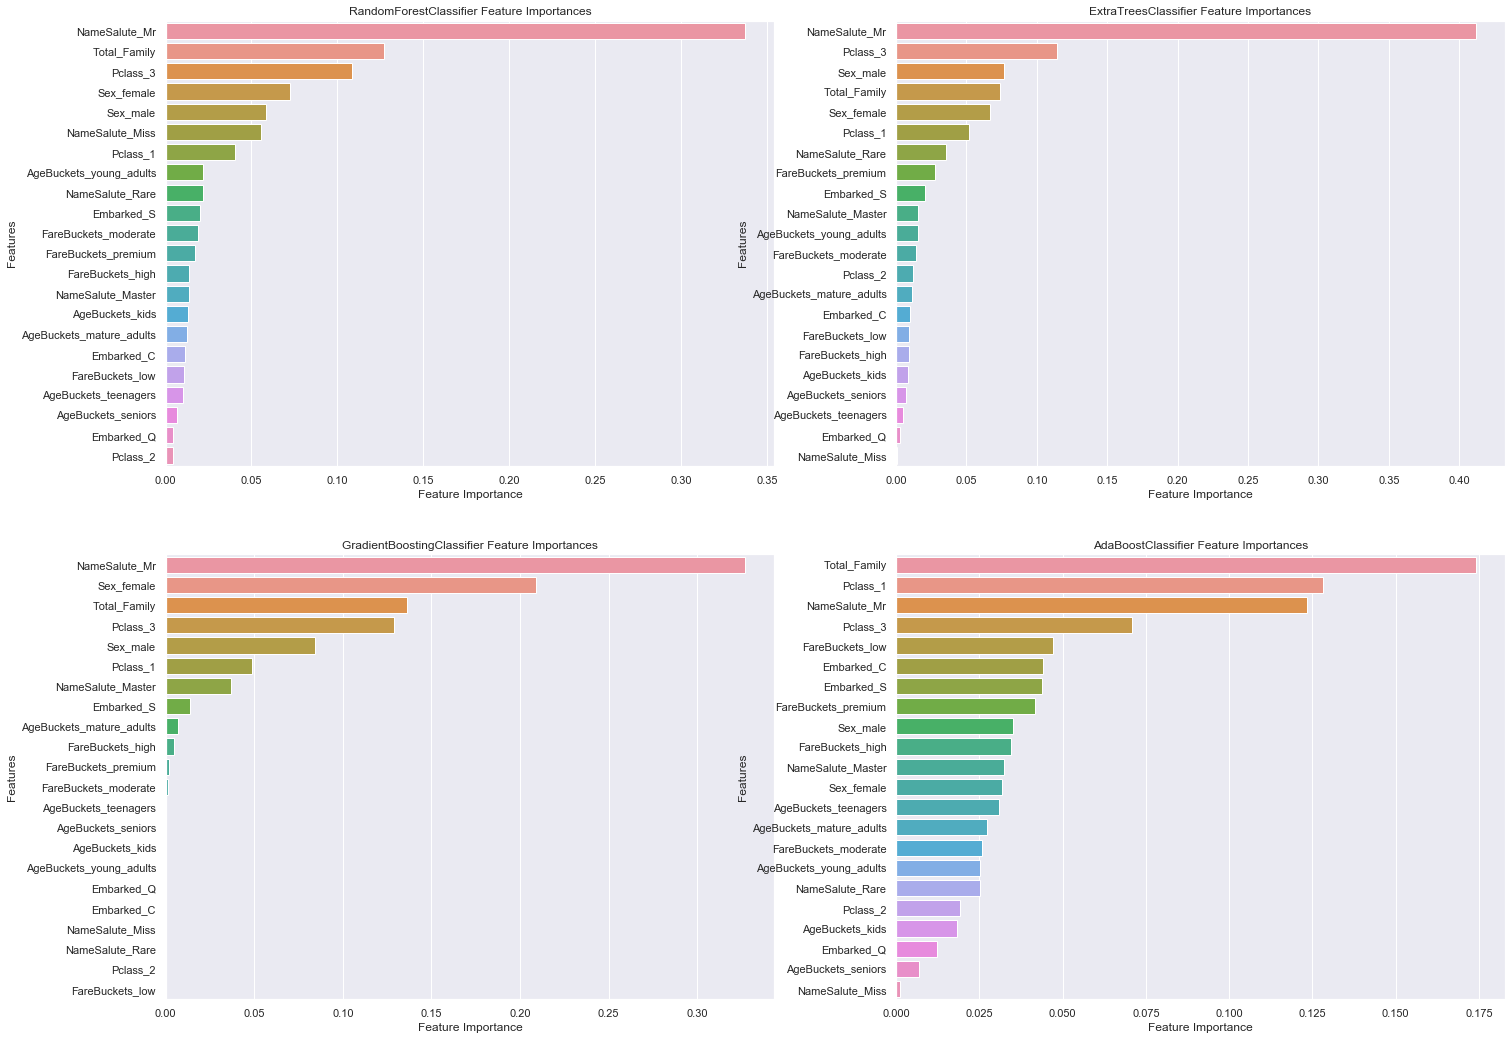

In [112]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(24, 18))
models = [randforest_best, etrees_best, gradientboost_best, adaboost_best]

model = 0
for row in range(nrows):
    for col in range(ncols):
        sorted_indices = np.argsort(models[model].feature_importances_)
        g = sns.barplot(x=models[model].feature_importances_[sorted_indices][::-1], y=column_names[sorted_indices][::-1], ax=axes[row, col])
        g.set_xlabel("Feature Importance")
        g.set_ylabel("Features")
        g.set_title(f"{type(models[model]).__name__} Feature Importances")
        model += 1